<a href="https://colab.research.google.com/github/NicholasNgaruiya/Magic_dataset_model/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df  = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"] == 0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train,Validate and Test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y


In [ ]:
train,x_train,y_train = scale_dataset(train,oversample=True)
valid,x_valid,y_valid = scale_dataset(valid,oversample=False)
test,x_test,y_test = scale_dataset(test,oversample=False)

#kNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1324
           1       0.86      0.86      0.86      2480

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1324
           1       0.74      0.90      0.81      2480

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1324
           1       0.85      0.83      0.84      2480

    accuracy                           0.80      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#Support Vestor Machines(SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1324
           1       0.90      0.90      0.90      2480

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)

  return nn_model,history

num_nodes 16,dropout_prob 0,lr 0.01,batch_size 32


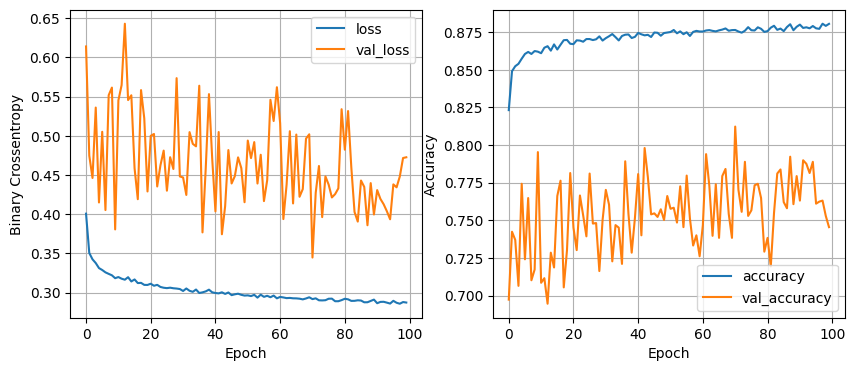

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8704
num_nodes 16,dropout_prob 0,lr 0.01,batch_size 64


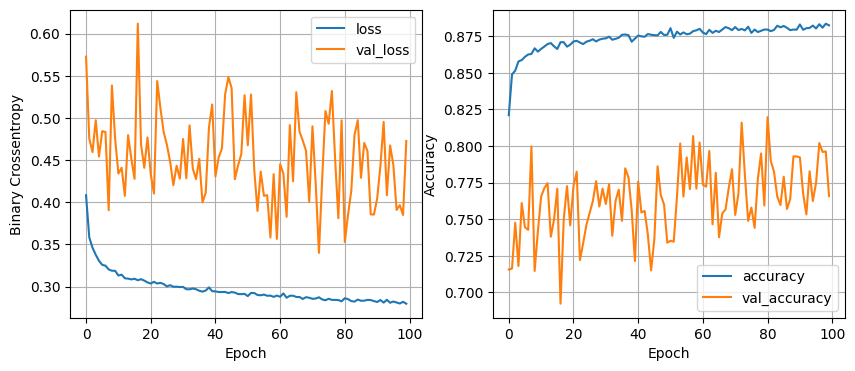

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8754
num_nodes 16,dropout_prob 0,lr 0.01,batch_size 128


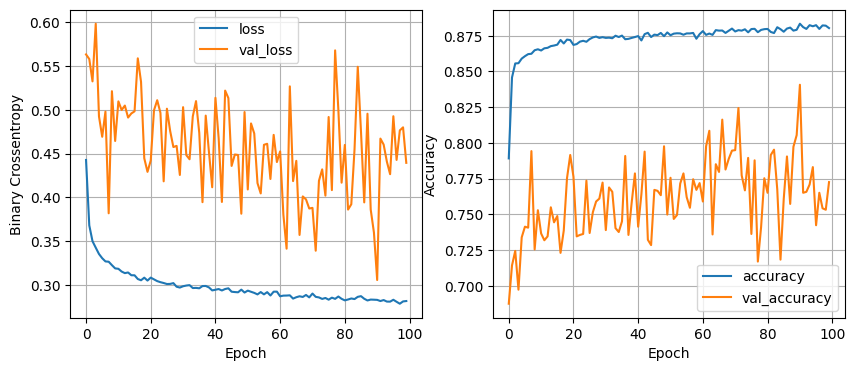

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8780
num_nodes 16,dropout_prob 0,lr 0.005,batch_size 32


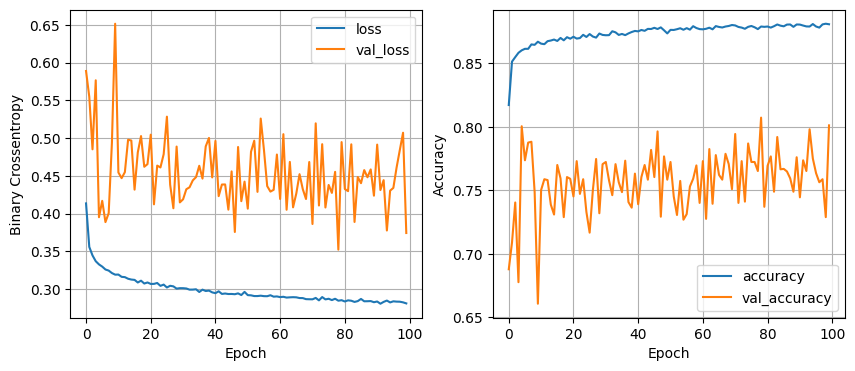

119/119 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8678
num_nodes 16,dropout_prob 0,lr 0.005,batch_size 64


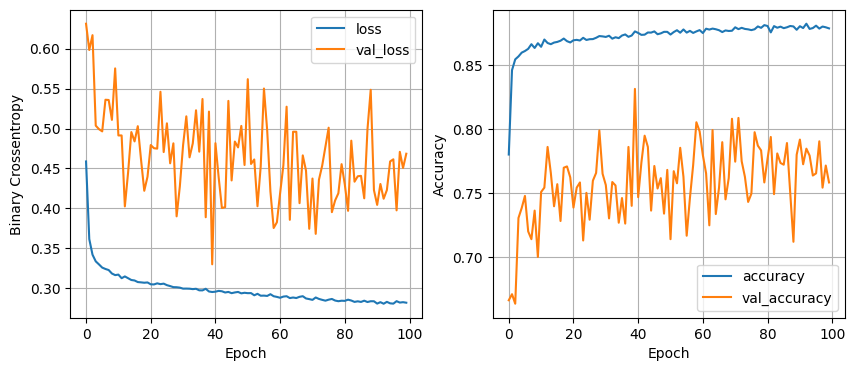

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8746
num_nodes 16,dropout_prob 0,lr 0.005,batch_size 128


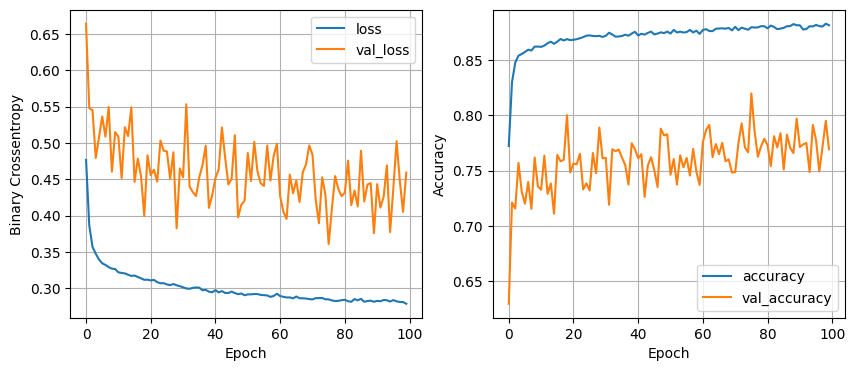

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8749
num_nodes 16,dropout_prob 0,lr 0.001,batch_size 32


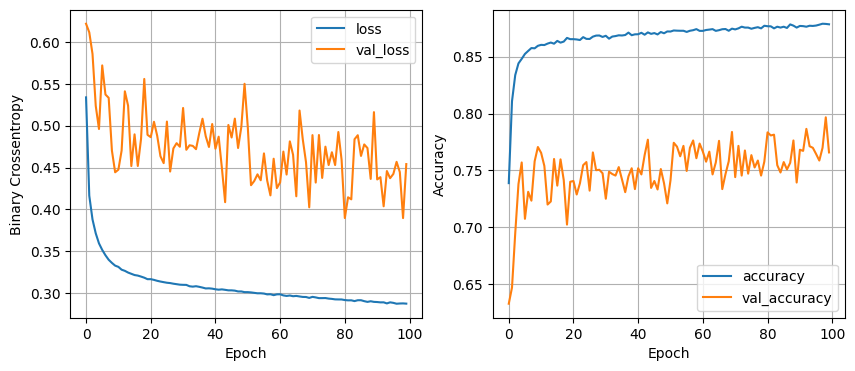

119/119 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.8807
num_nodes 16,dropout_prob 0,lr 0.001,batch_size 64


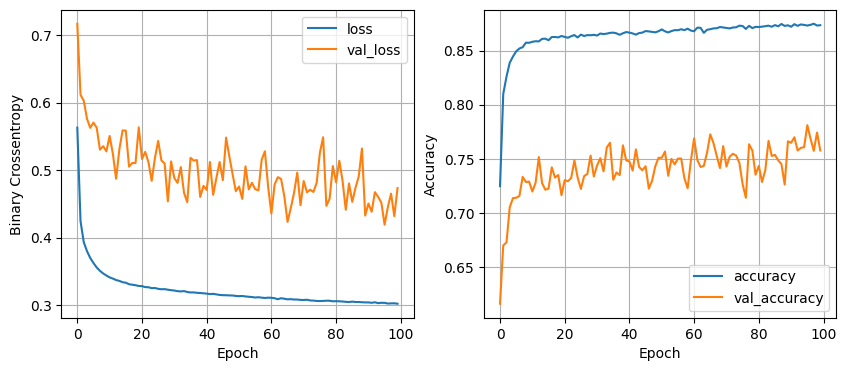

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8754
num_nodes 16,dropout_prob 0,lr 0.001,batch_size 128


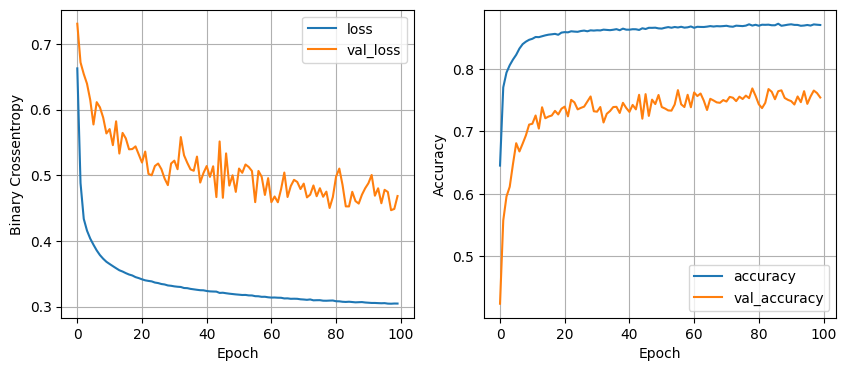

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8738
num_nodes 16,dropout_prob 0.2,lr 0.01,batch_size 32


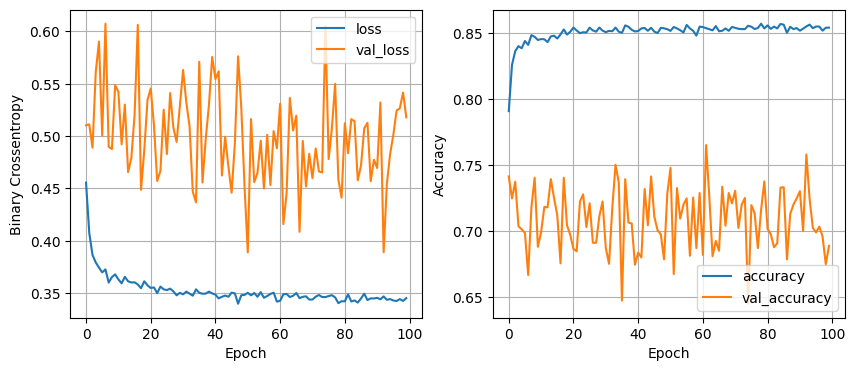

119/119 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8667
num_nodes 16,dropout_prob 0.2,lr 0.01,batch_size 64


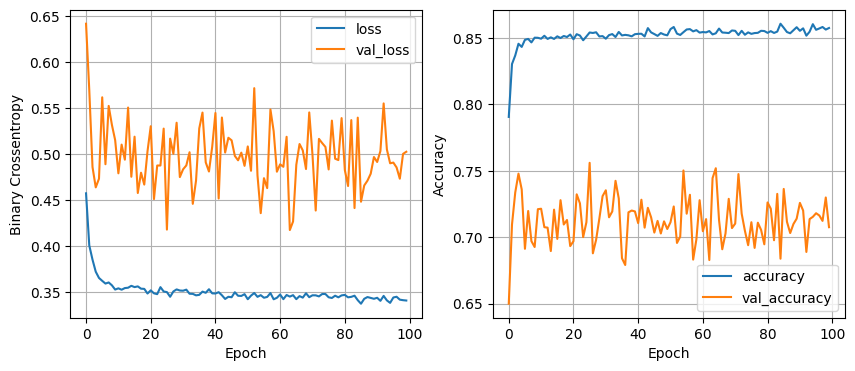

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8704
num_nodes 16,dropout_prob 0.2,lr 0.01,batch_size 128


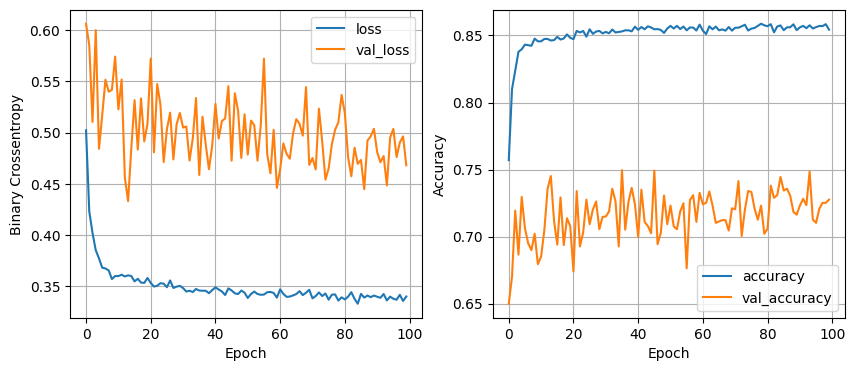

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8725
num_nodes 16,dropout_prob 0.2,lr 0.005,batch_size 32


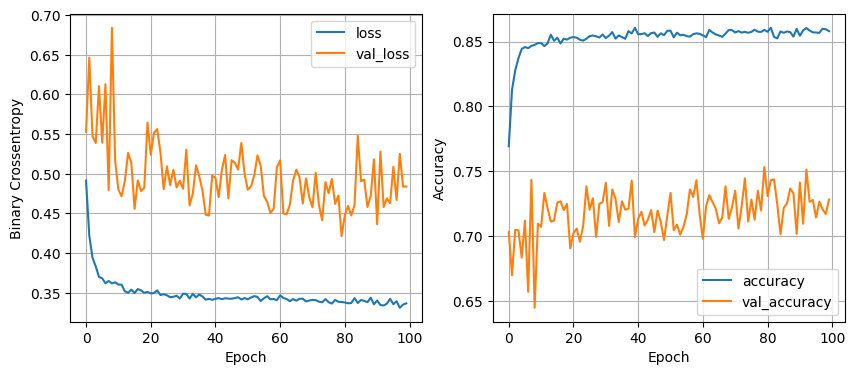

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8736
num_nodes 16,dropout_prob 0.2,lr 0.005,batch_size 64


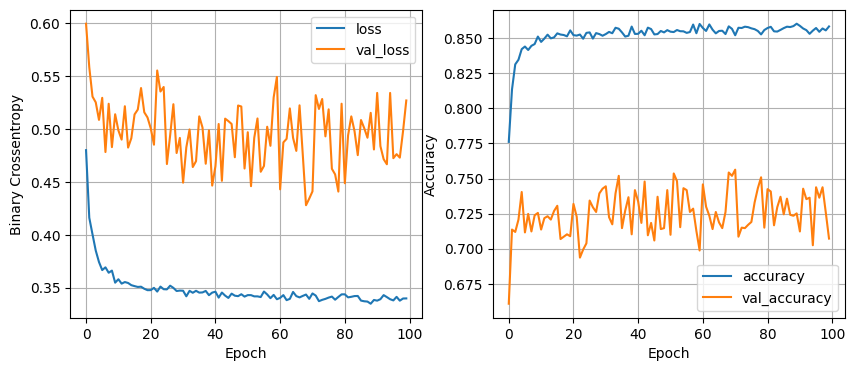

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8717
num_nodes 16,dropout_prob 0.2,lr 0.005,batch_size 128


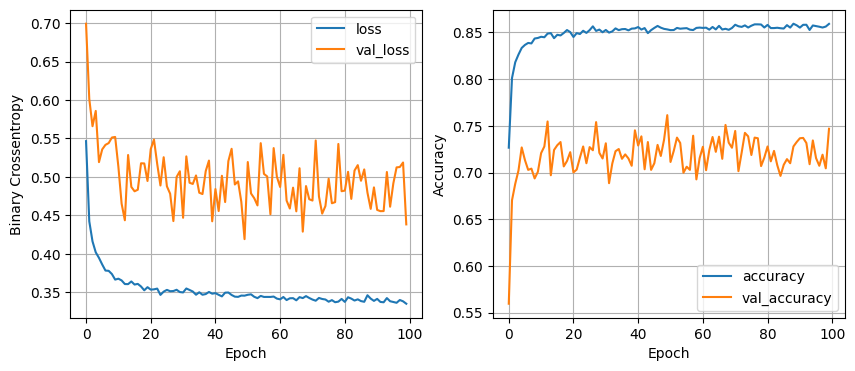

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8725
num_nodes 16,dropout_prob 0.2,lr 0.001,batch_size 32


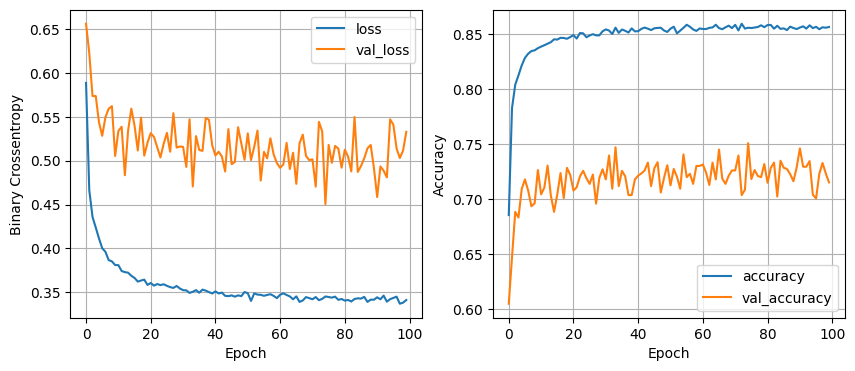

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8730
num_nodes 16,dropout_prob 0.2,lr 0.001,batch_size 64


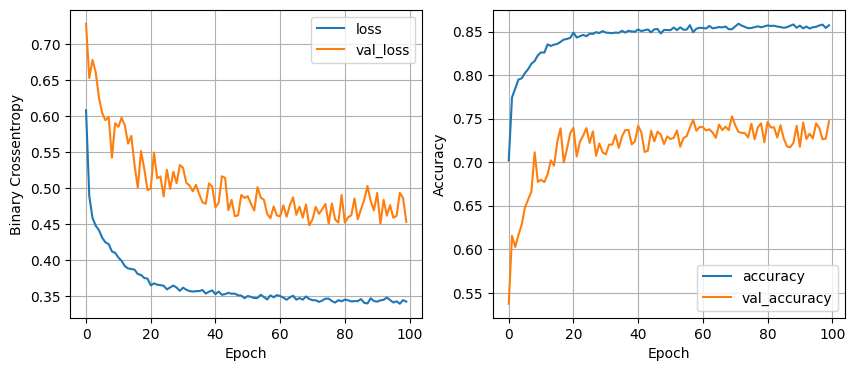

119/119 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.8754
num_nodes 16,dropout_prob 0.2,lr 0.001,batch_size 128


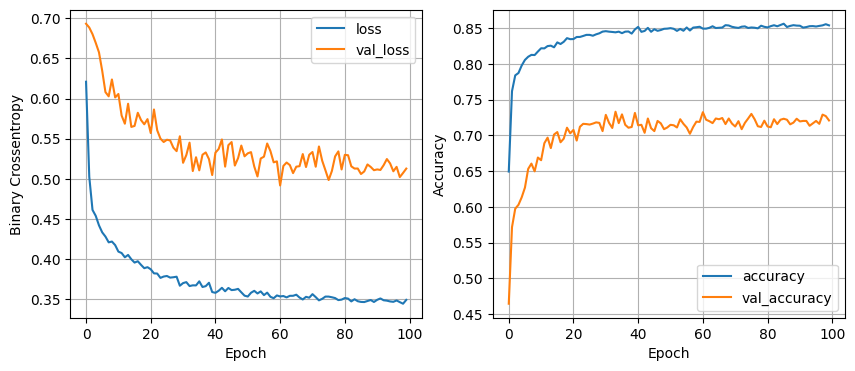

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8743
num_nodes 32,dropout_prob 0,lr 0.01,batch_size 32


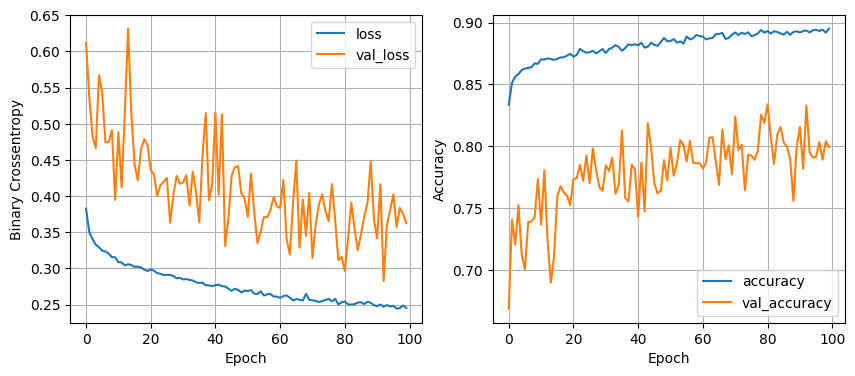

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8704
num_nodes 32,dropout_prob 0,lr 0.01,batch_size 64


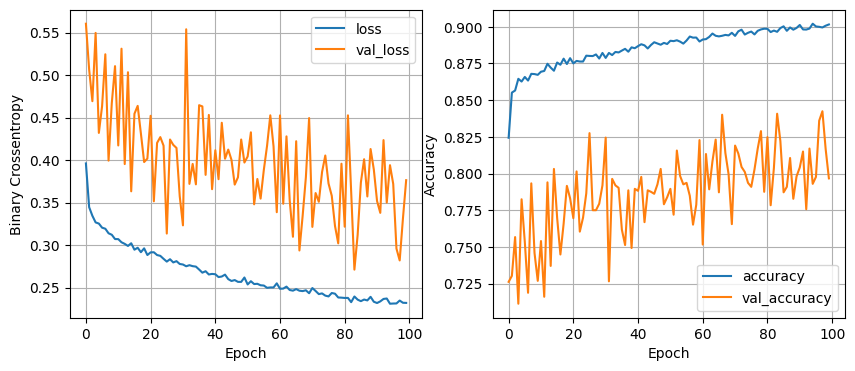

119/119 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8675
num_nodes 32,dropout_prob 0,lr 0.01,batch_size 128


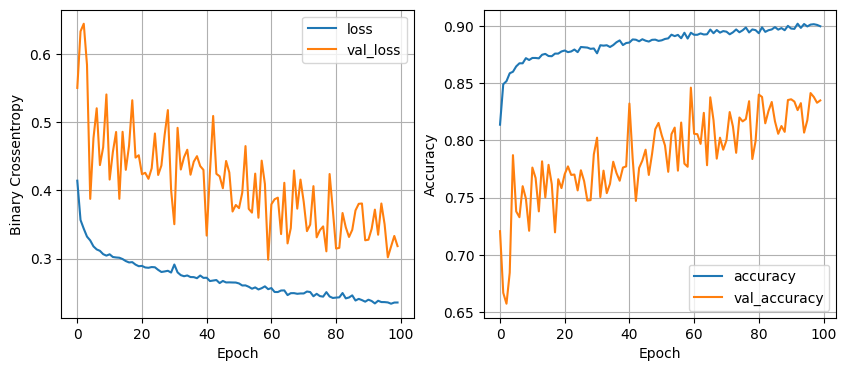

119/119 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8599
num_nodes 32,dropout_prob 0,lr 0.005,batch_size 32


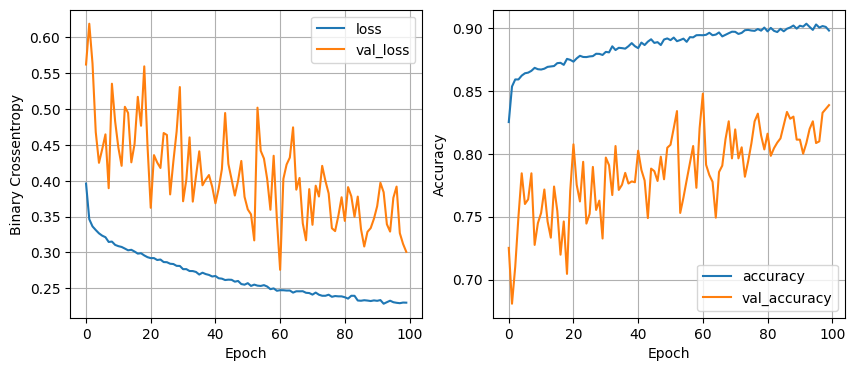

119/119 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8633
num_nodes 32,dropout_prob 0,lr 0.005,batch_size 64


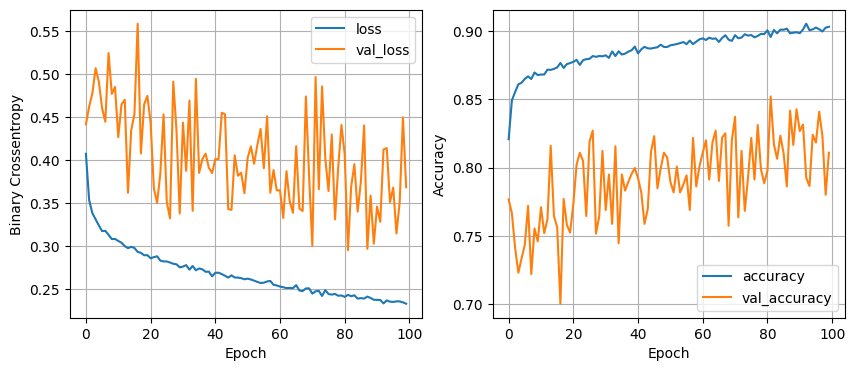

119/119 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8736
num_nodes 32,dropout_prob 0,lr 0.005,batch_size 128


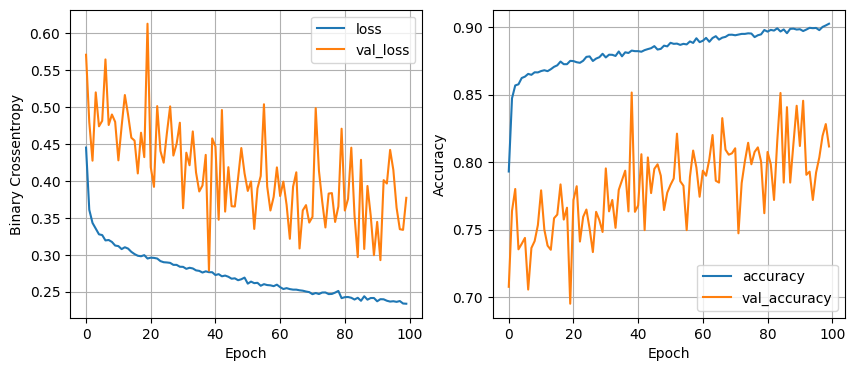

119/119 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8746
num_nodes 32,dropout_prob 0,lr 0.001,batch_size 32


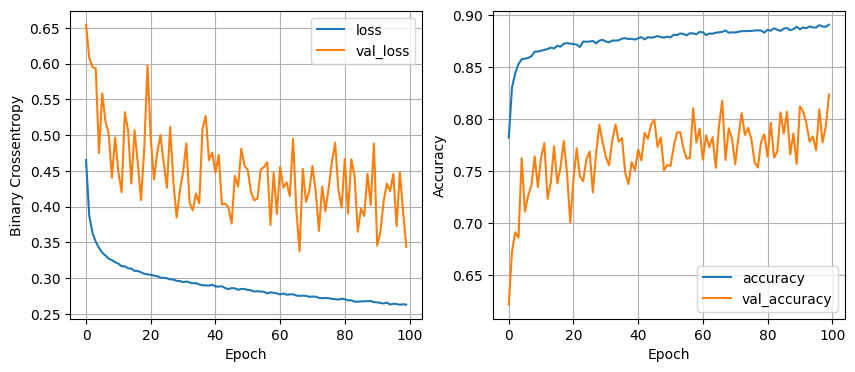

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8759
num_nodes 32,dropout_prob 0,lr 0.001,batch_size 64


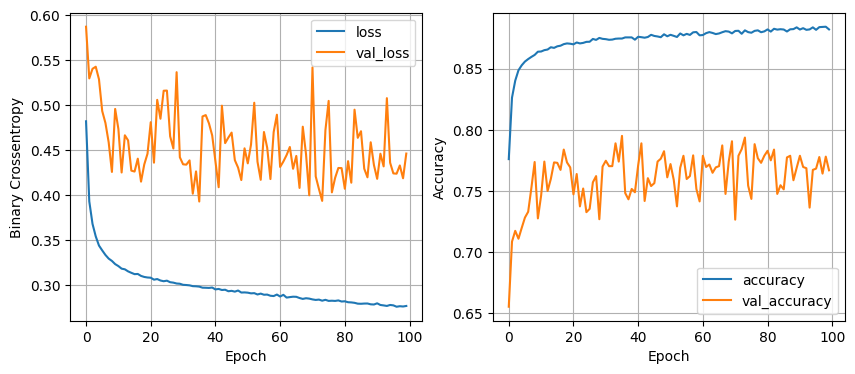

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8699
num_nodes 32,dropout_prob 0,lr 0.001,batch_size 128


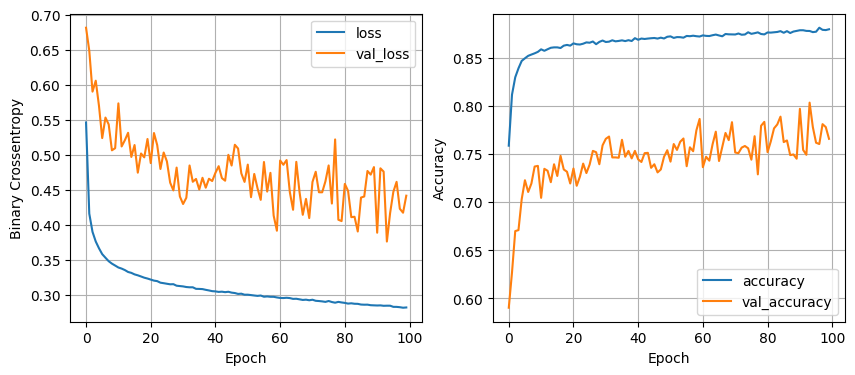

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8720
num_nodes 32,dropout_prob 0.2,lr 0.01,batch_size 32


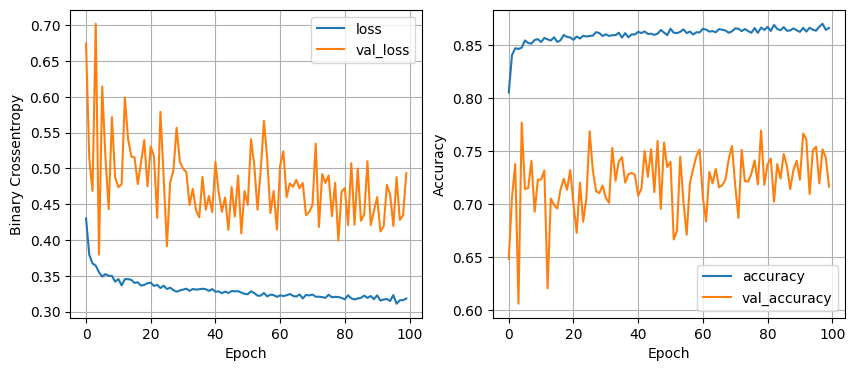

119/119 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.8704
num_nodes 32,dropout_prob 0.2,lr 0.01,batch_size 64


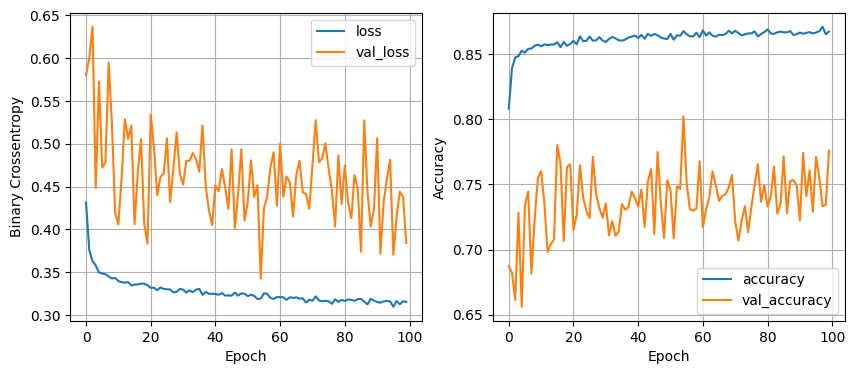

119/119 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.8754
num_nodes 32,dropout_prob 0.2,lr 0.01,batch_size 128


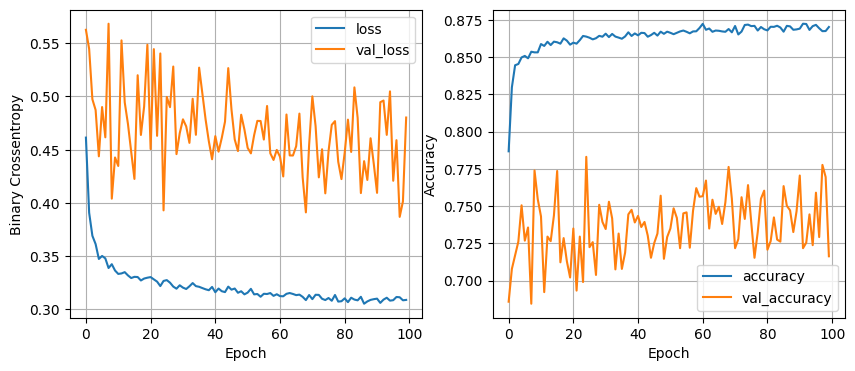

119/119 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8751
num_nodes 32,dropout_prob 0.2,lr 0.005,batch_size 32


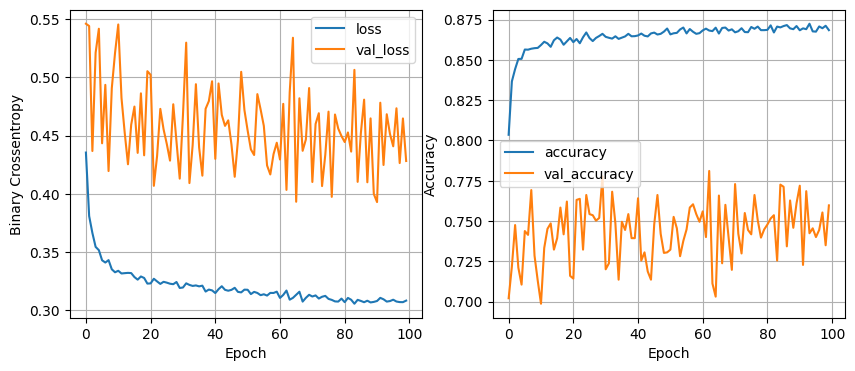

119/119 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8746
num_nodes 32,dropout_prob 0.2,lr 0.005,batch_size 64


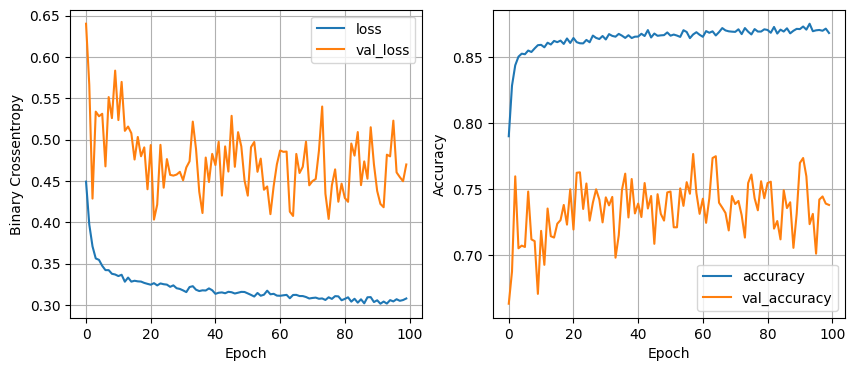

119/119 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8743
num_nodes 32,dropout_prob 0.2,lr 0.005,batch_size 128


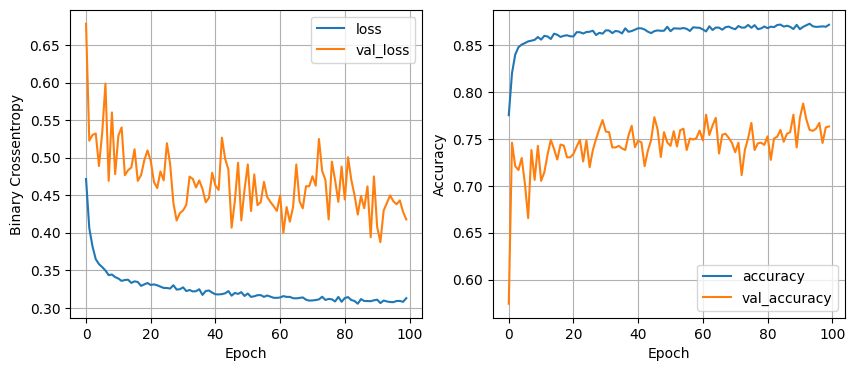

119/119 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8817
num_nodes 32,dropout_prob 0.2,lr 0.001,batch_size 32


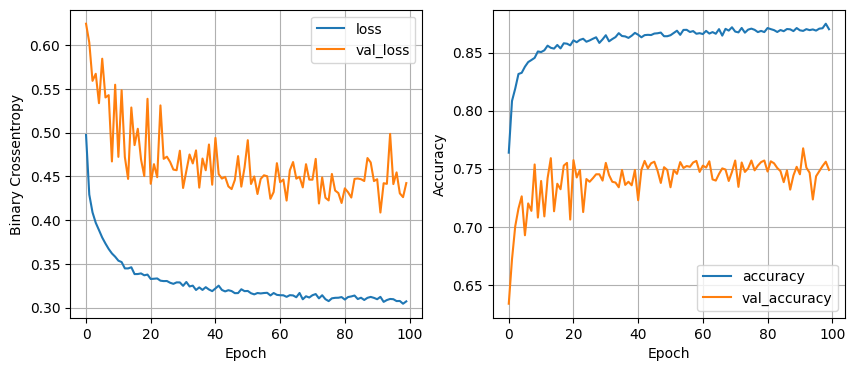

119/119 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8725
num_nodes 32,dropout_prob 0.2,lr 0.001,batch_size 64


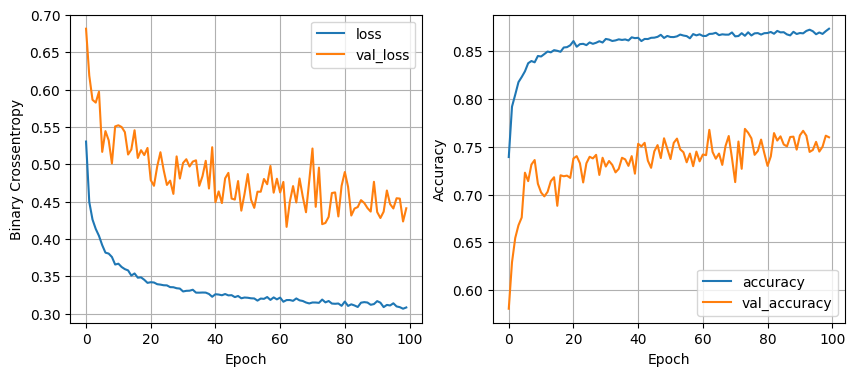

119/119 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8775
num_nodes 32,dropout_prob 0.2,lr 0.001,batch_size 128


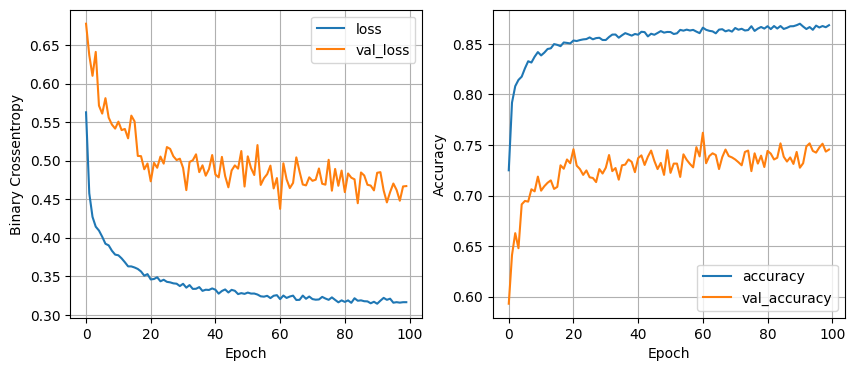

119/119 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8793
num_nodes 64,dropout_prob 0,lr 0.01,batch_size 32


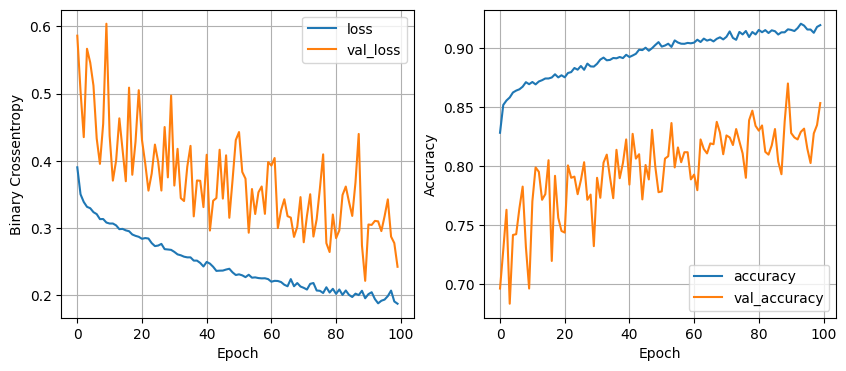

119/119 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8659
num_nodes 64,dropout_prob 0,lr 0.01,batch_size 64


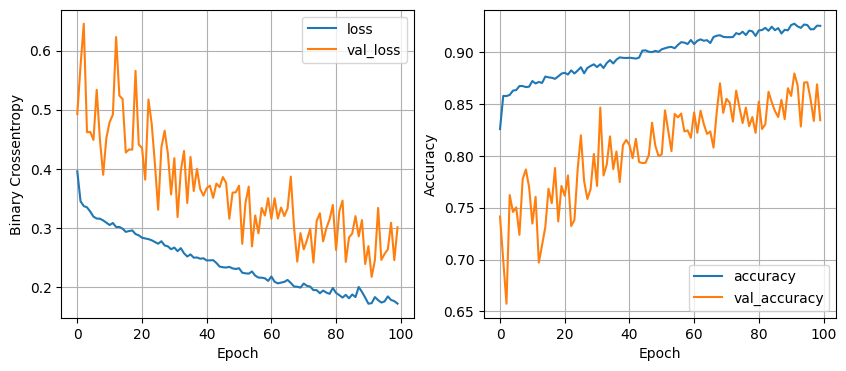

119/119 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8617
num_nodes 64,dropout_prob 0,lr 0.01,batch_size 128


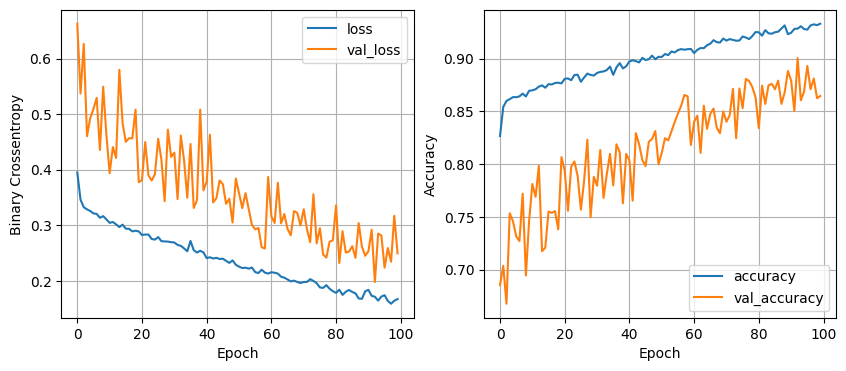

119/119 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8536
num_nodes 64,dropout_prob 0,lr 0.005,batch_size 32


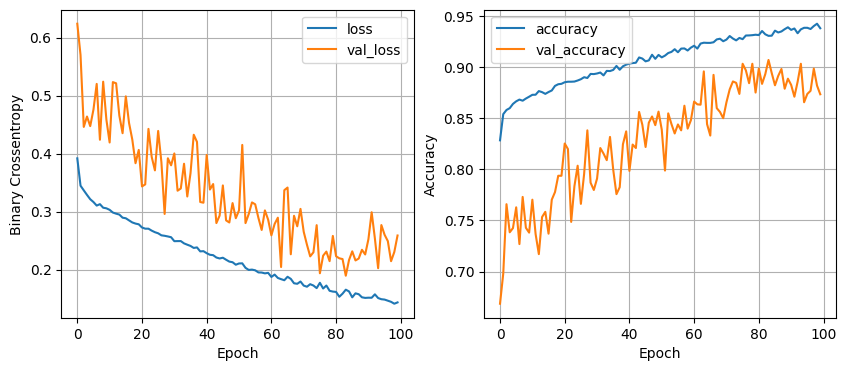

119/119 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8672
num_nodes 64,dropout_prob 0,lr 0.005,batch_size 64


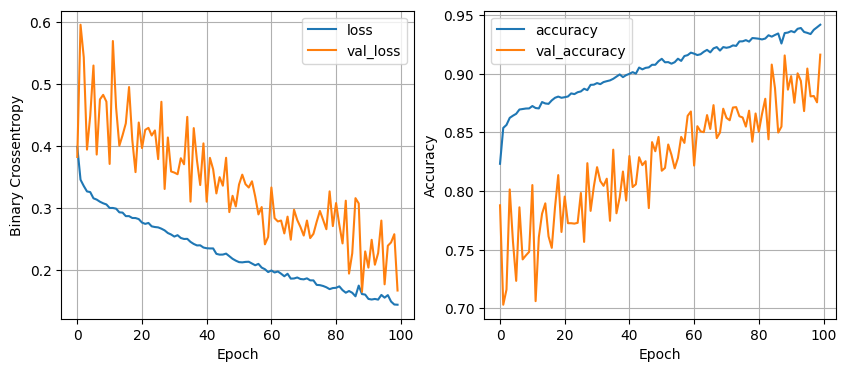

119/119 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8520
num_nodes 64,dropout_prob 0,lr 0.005,batch_size 128


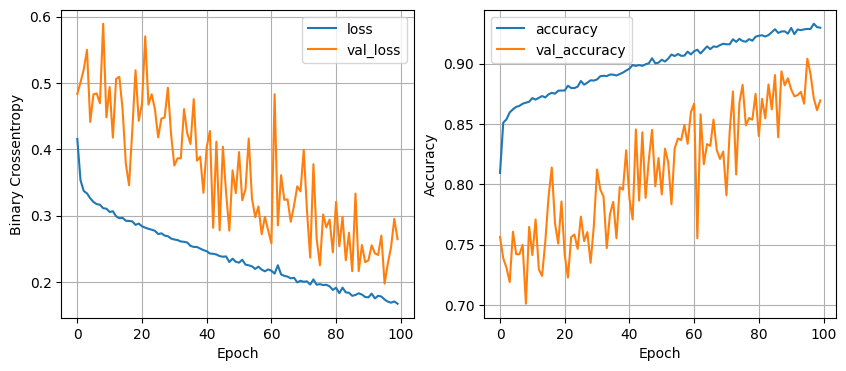

119/119 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8686
num_nodes 64,dropout_prob 0,lr 0.001,batch_size 32


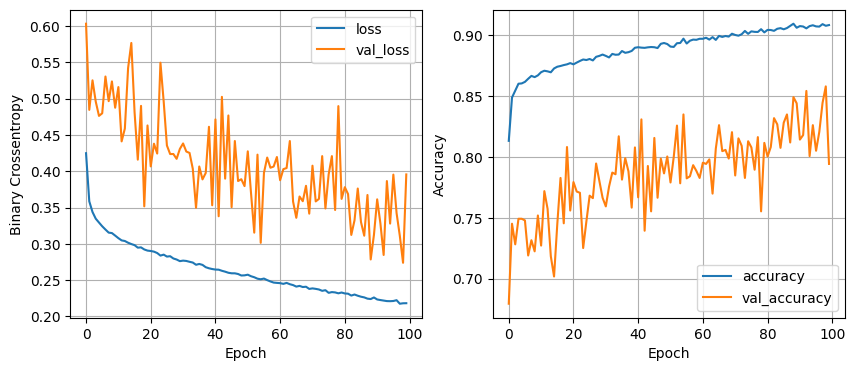

119/119 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8699
num_nodes 64,dropout_prob 0,lr 0.001,batch_size 64


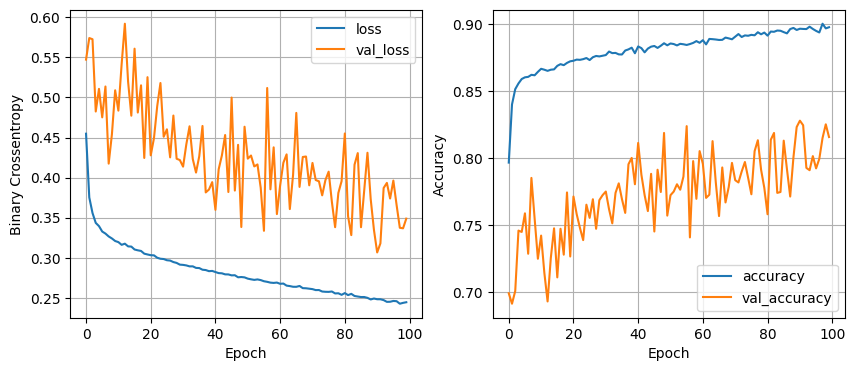

119/119 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8799
num_nodes 64,dropout_prob 0,lr 0.001,batch_size 128


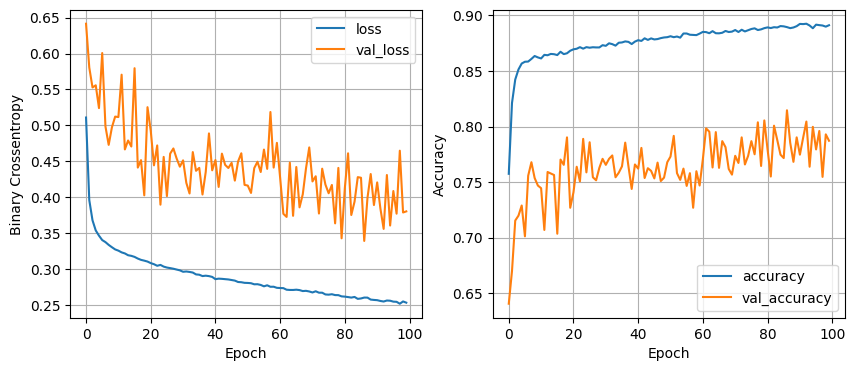

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8736
num_nodes 64,dropout_prob 0.2,lr 0.01,batch_size 32


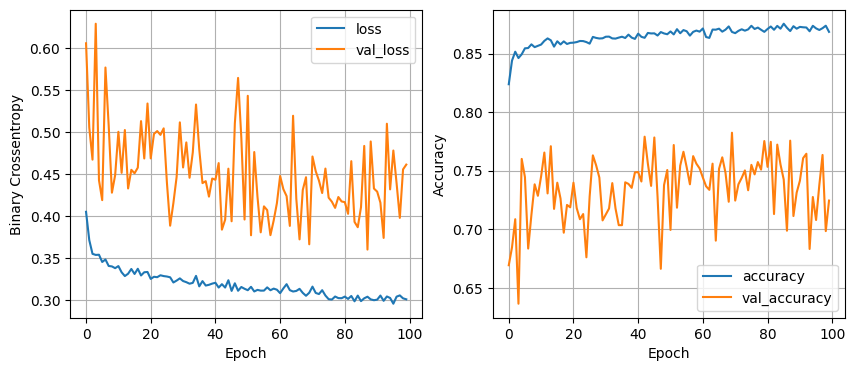

119/119 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 0.8707
num_nodes 64,dropout_prob 0.2,lr 0.01,batch_size 64


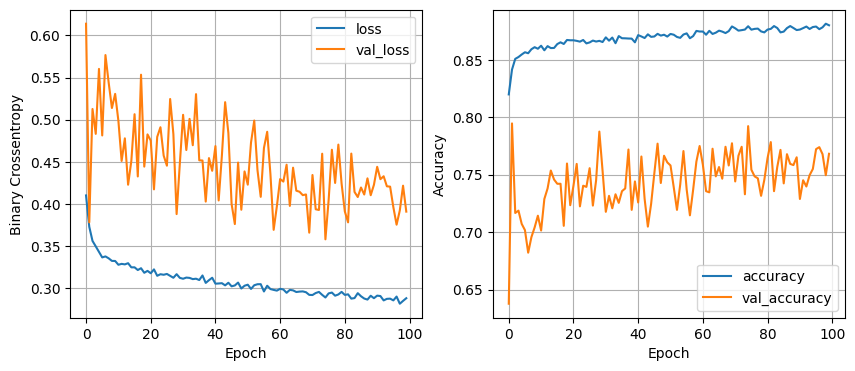

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8785
num_nodes 64,dropout_prob 0.2,lr 0.01,batch_size 128


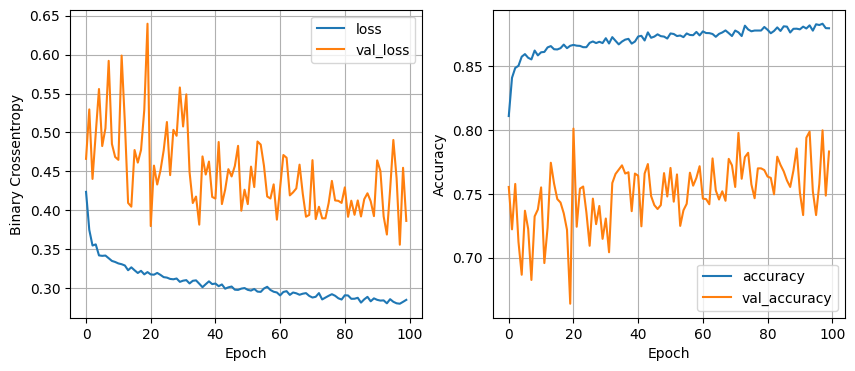

119/119 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8783
num_nodes 64,dropout_prob 0.2,lr 0.005,batch_size 32


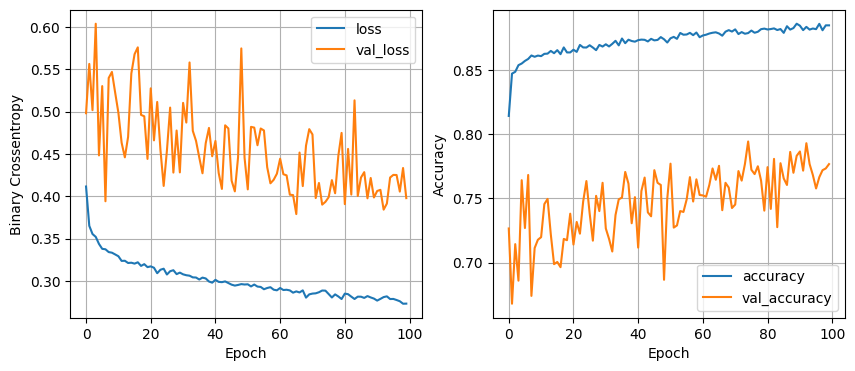

119/119 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.8833
num_nodes 64,dropout_prob 0.2,lr 0.005,batch_size 64


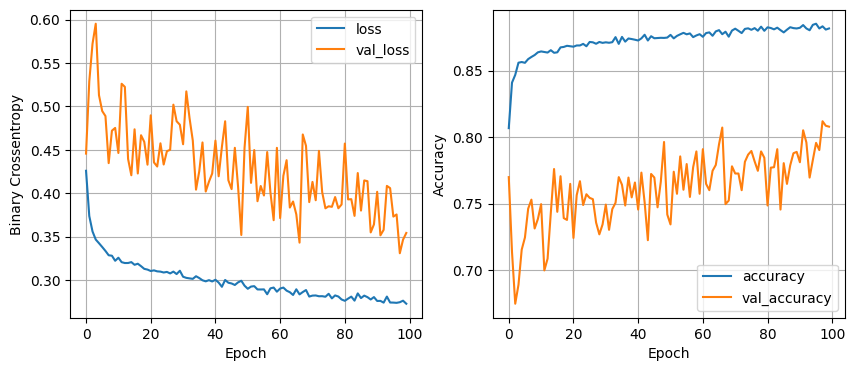

119/119 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.8788
num_nodes 64,dropout_prob 0.2,lr 0.005,batch_size 128


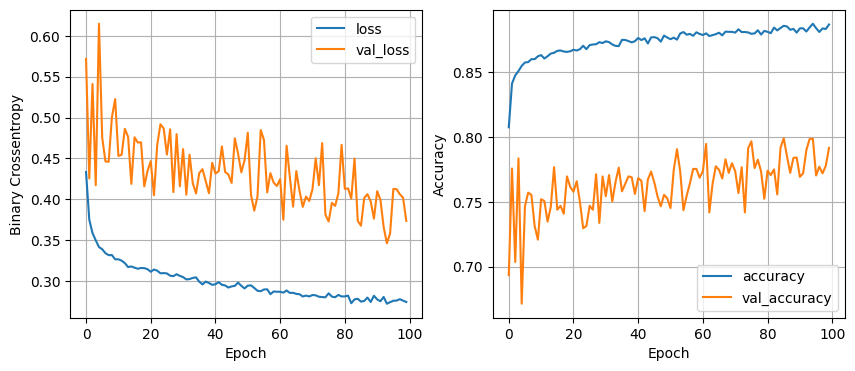

119/119 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8817
num_nodes 64,dropout_prob 0.2,lr 0.001,batch_size 32


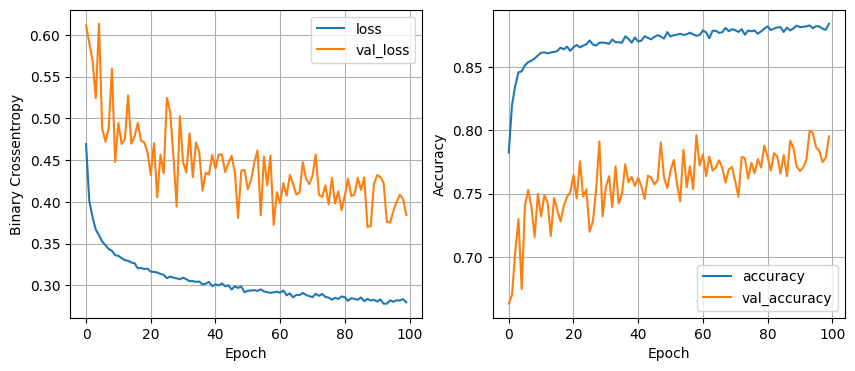

119/119 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8830
num_nodes 64,dropout_prob 0.2,lr 0.001,batch_size 64


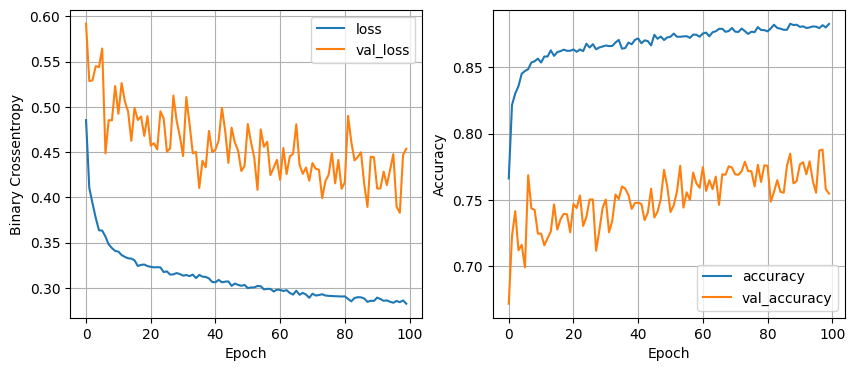

119/119 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8804
num_nodes 64,dropout_prob 0.2,lr 0.001,batch_size 128


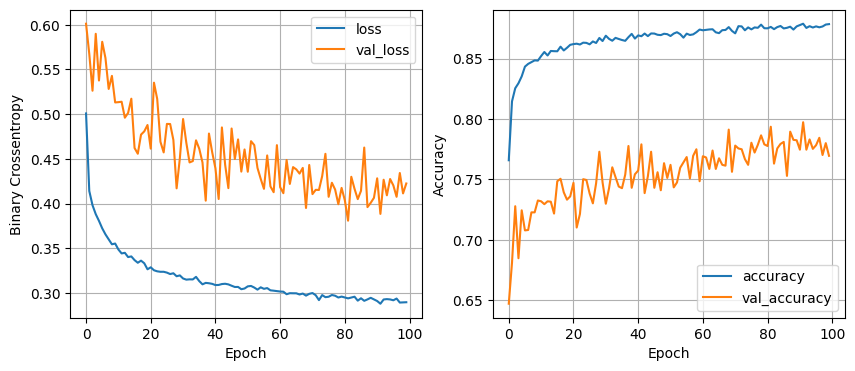

119/119 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.8775


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"num_nodes {num_nodes},dropout_prob {dropout_prob},lr {lr},batch_size {batch_size}")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
         least_val_loss = val_loss
         least_loss_model = model